# Tensorflow Unet

This notebook implement unet for image segmentation using tensorflow.
<br> Part of the code is referenced from http://tf-unet.readthedocs.io/en/latest/usage.html


In [43]:
%matplotlib inline

from tf_unet import unet, util, image_util
from glob import glob
from scipy.misc import imread
from scipy.misc import imsave
from numpy import array,load,reshape
import matplotlib.pyplot as plt


output_path = "data/output"

## Preprocessing

Combine 20 training image file into one, in order to generate 151 images for training in total.
Save training image and corresponding mask as tiff file as data provider

In [2]:
# This cell would take a 5 mins 
files = sorted(glob('data/images/*.tiff'))
mask = load("neurons.npy")
for i in range(int(len(files)/20)):
    if i == 150:
        imgs = array([imread(f) for f in files[20*i:]])
    else:
        imgs = array([imread(f) for f in files[20*i:20*(i+1)]])
    img = imgs.sum(axis=0)
    imsave('train_data/train_' + str(i) + ".tiff", img)
    imsave('train_data/train_' + str(i) + "_mask.tiff", mask)

KeyboardInterrupt: 

## Training 

Train the Unet model

In [3]:
data_provider = image_util.ImageDataProvider("train_data/*.tiff")


Number of files used: 151


In [4]:
#setup & training
net = unet.Unet(layers=3, features_root=64, channels=1, n_class=2)
trainer = unet.Trainer(net)
path = trainer.train(data_provider, output_path, training_iters=1, epochs=1)

2018-02-28 23:56:38,714 Layers 3, features 64, filter size 3x3, pool size: 2x2
2018-02-28 23:56:44,296 Removing '/Users/ailingwang/Documents/GitHub/Canady/prediction'
2018-02-28 23:56:44,298 Removing '/Users/ailingwang/Documents/GitHub/Canady/data/output'
2018-02-28 23:56:44,304 Allocating '/Users/ailingwang/Documents/GitHub/Canady/prediction'
2018-02-28 23:56:44,305 Allocating '/Users/ailingwang/Documents/GitHub/Canady/data/output'
2018-02-28 23:58:47,501 Verification error= 9.3%, loss= 0.6624
2018-02-28 23:58:54,179 Start optimization
2018-03-01 00:00:25,148 Iter 0, Minibatch Loss= 0.5073, Training Accuracy= 0.9066, Minibatch error= 9.3%
2018-03-01 00:00:25,150 Epoch 0, Average loss: 0.6639, learning rate: 0.2000
2018-03-01 00:02:29,951 Verification error= 9.3%, loss= 0.5077
2018-03-01 00:02:35,340 Optimization Finished!


## Prediction

In [12]:
test_files = sorted(glob('data/test_images/*.tiff'))
test_imgs = array([imread(f) for f in files[:20]]).sum(axis=0)
#imsave('test_img.tiff', test_imgs )

In [20]:
test_img = reshape(test_imgs,[1,512,512,1])
prediction = net.predict(path, test_img)

2018-03-01 00:09:28,317 Model restored from file: data/output/model.cpkt


In [36]:
def result_matrix(prediction):
    result = []
    for item in prediction[0]:
        inner_list = []
        for i in item:
            if i[1] == 0:
                inner_list.append(0)
            elif i[0]>i[1]:
                inner_list.append(1)
        result.append(inner_list)
    return result



In [40]:
result = array(result_matrix(prediction))

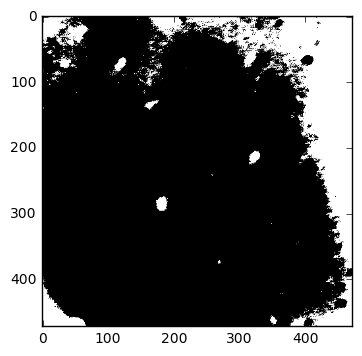

In [45]:
plt.imshow(result,cmap='gray')

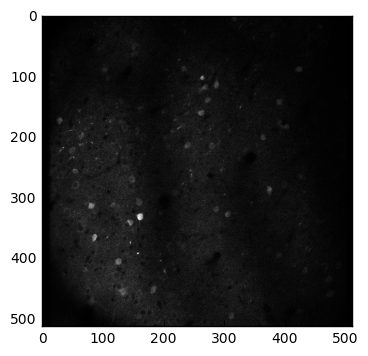

In [49]:
plt.imshow(test_imgs,cmap='gray')